In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# datetime 열을 datetime 데이터형으로 바꿔줌
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv", parse_dates=[0])
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv", parse_dates=[0])
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampleSubmission.csv")

In [3]:
print(train.shape)
print(train.head)

(10886, 12)
<bound method NDFrame.head of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0    

In [4]:
print(test.shape)
print(test.head)

(6493, 9)
<bound method NDFrame.head of                 datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1    2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2    2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3    2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4    2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
...                  ...     ...      ...         ...      ...    ...     ...   
6488 2012-12-31 19:00:00       1        0           1        2  10.66  12.880   
6489 2012-12-31 20:00:00       1        0           1        2  10.66  12.880   
6490 2012-12-31 21:00:00       1        0           1        1  10.66  12.880   
6491 2012-12-31 22:00:00       1        0           1        1  10.66  13.635   
6492 2012-12-31 23:00:00       1        0           1        1  10.66

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
# 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


<ipython-input-9-5657630c53e7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(), annot=True)


<Axes: >

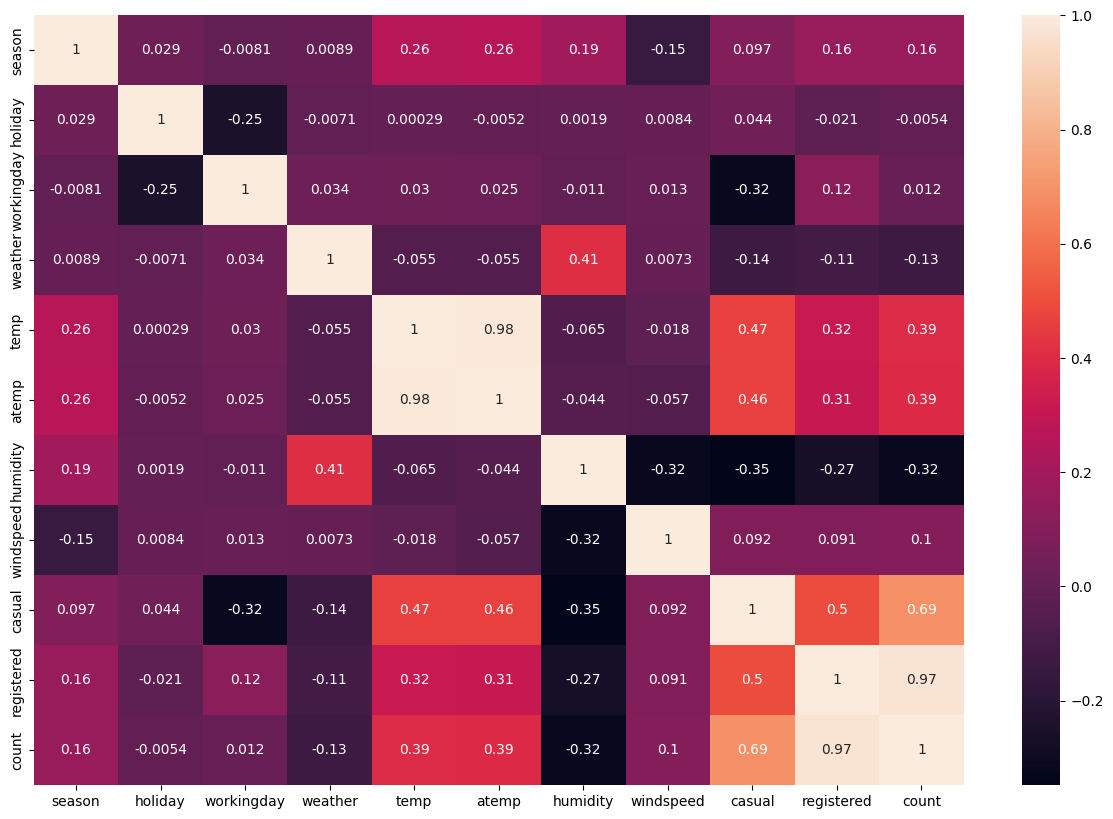

In [9]:
# 상관관계

plt.figure(figsize=(15,10))
sns.heatmap(data=train.corr(), annot=True)
# 결과 : 양의 상관관계-온도, 체감온도
# 음의 상관관계-근무일과 비회원의 대여량, 습도와 풍속 및 대여량, 풍속과 계절

In [10]:
# datetime 칼람에서 연/월/일/시간/숫자요일 컬럼 나누기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [11]:
# datetime 칼람에서 연/월/일/시간/숫자요일 컬럼 나누기
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


<Axes: xlabel='season', ylabel='count'>

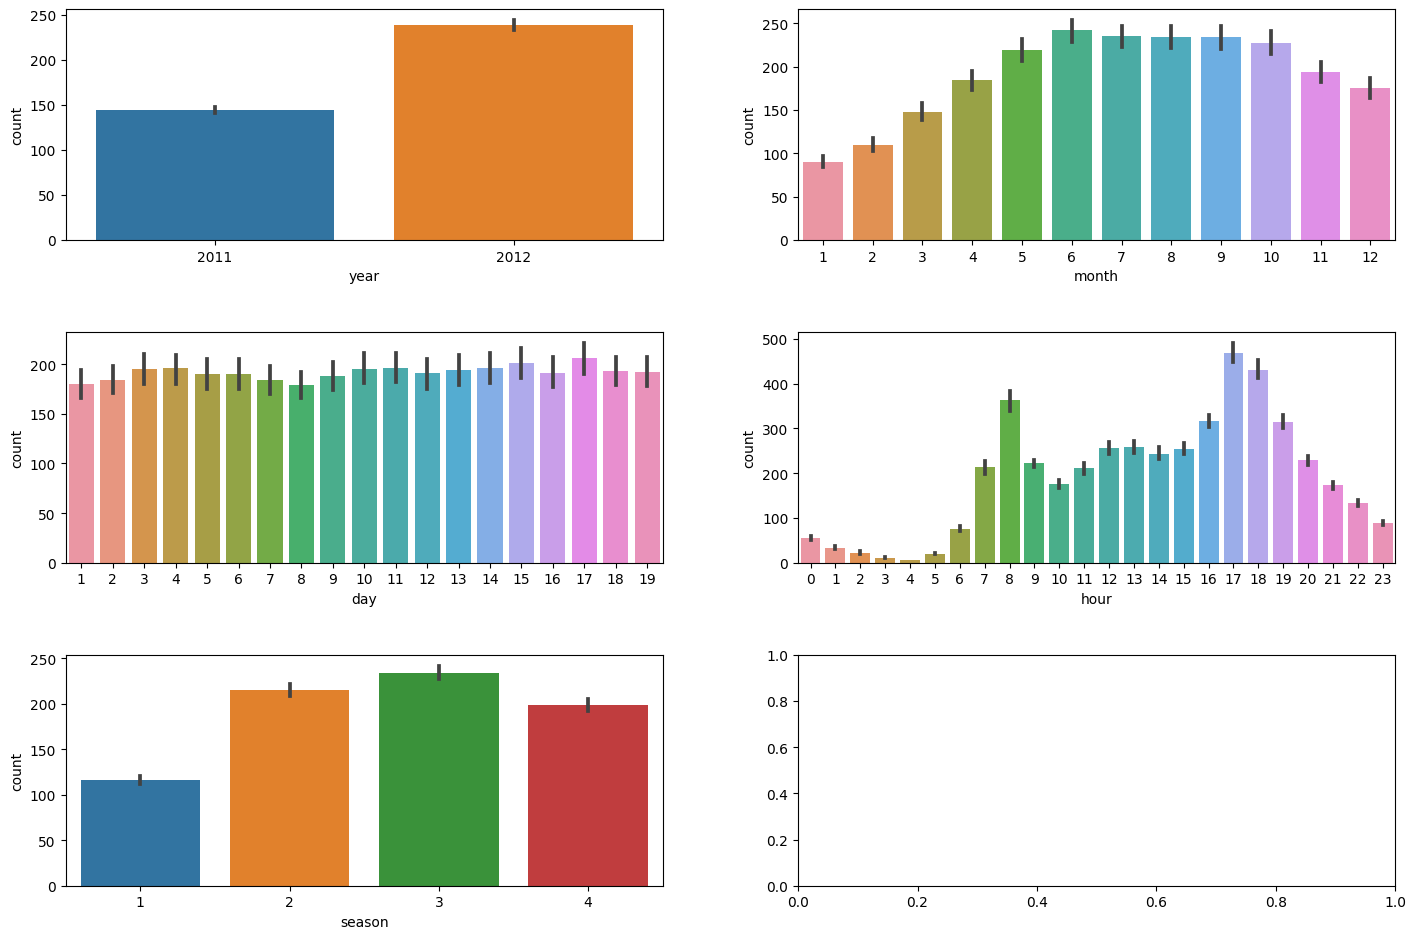

In [12]:
# 월별 대여량 분석
mpl.rc('font', size=10)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='season', y='count', data=train, ax=axes[2,0])

# 2011년보다 2012년 대여량이 더 많음. 자전거 대여 사업 성장
# 6-10월애 대여량이 많음
# 20-31일 범위가 test 데이터셋이므로 과적합 방지를 위해 feature로 사용하지 않음
# 출퇴근 시간(6시, 17시, 18시) 대여량이 많음
# 가을 > 여름 > 겨울 > 봄 순으로 대여량이 많음

<Axes: xlabel='hour', ylabel='count'>

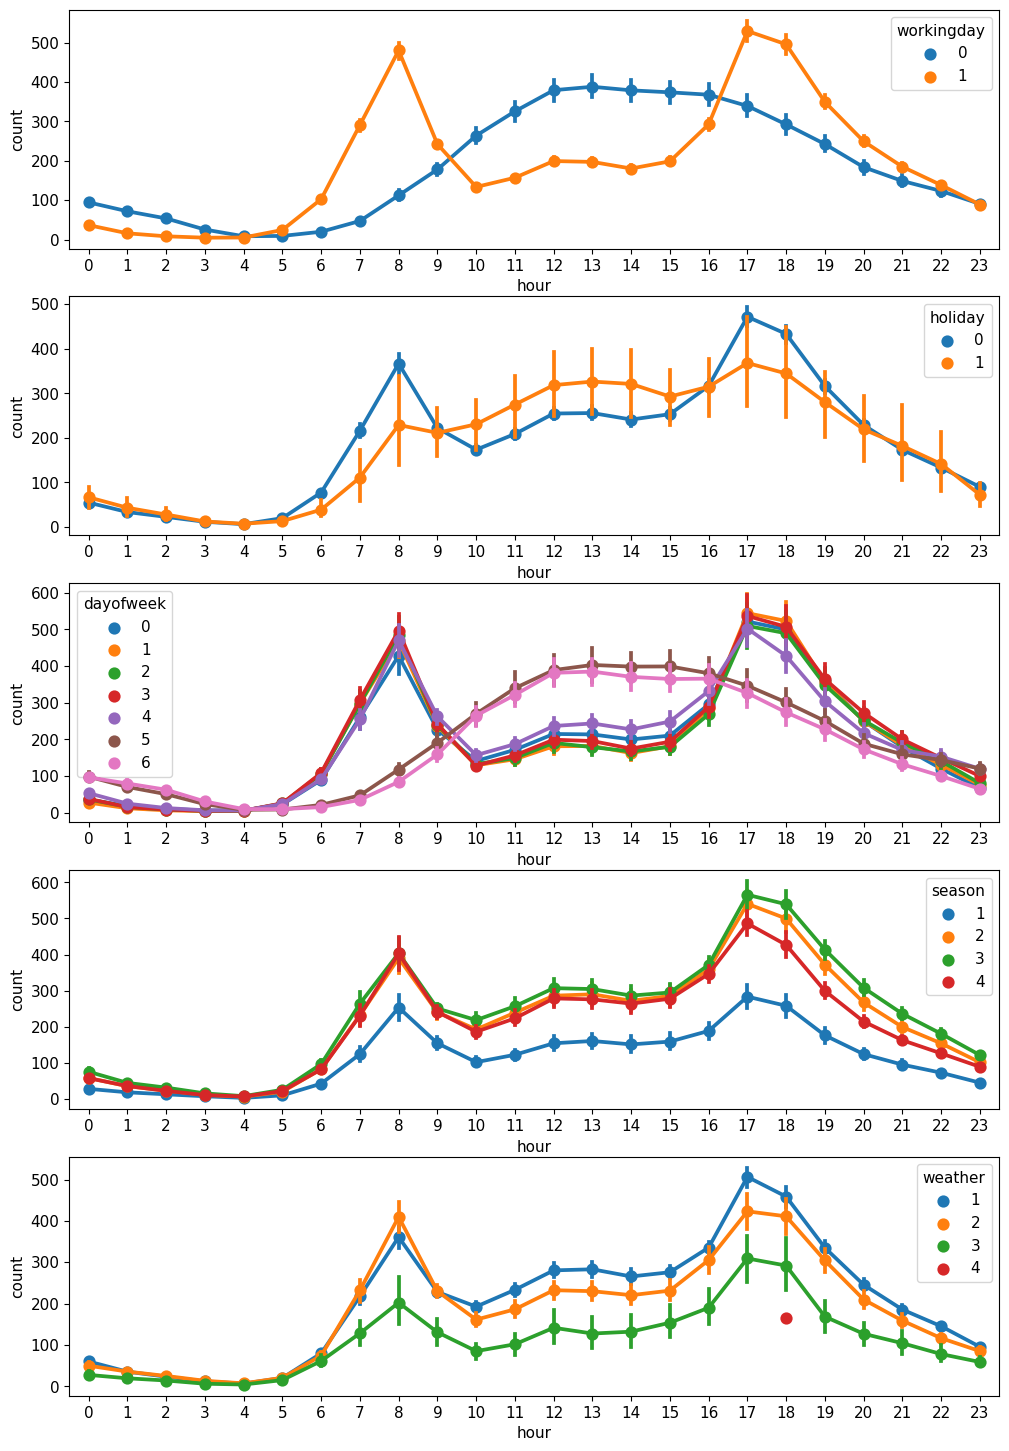

In [13]:
# 시간에 따른 대여량
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='dayofweek', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

# dayofweek는 토(0),일(1),월(2),화(3),수(4),목(5),금(6)
# 휴일에는 10-15시 대여량 많고, 근무일에는 8시, 17-18시 대여량 많음
# 10-16시에 일요일보다 토요일 대여량이 더 많음
# 가을/여름 8시, 17시, 18시에 대여량 가장 많음
# Sunny, Cloud한 날씨의 8시, 17시, 18시에 대여량이 가장 많음

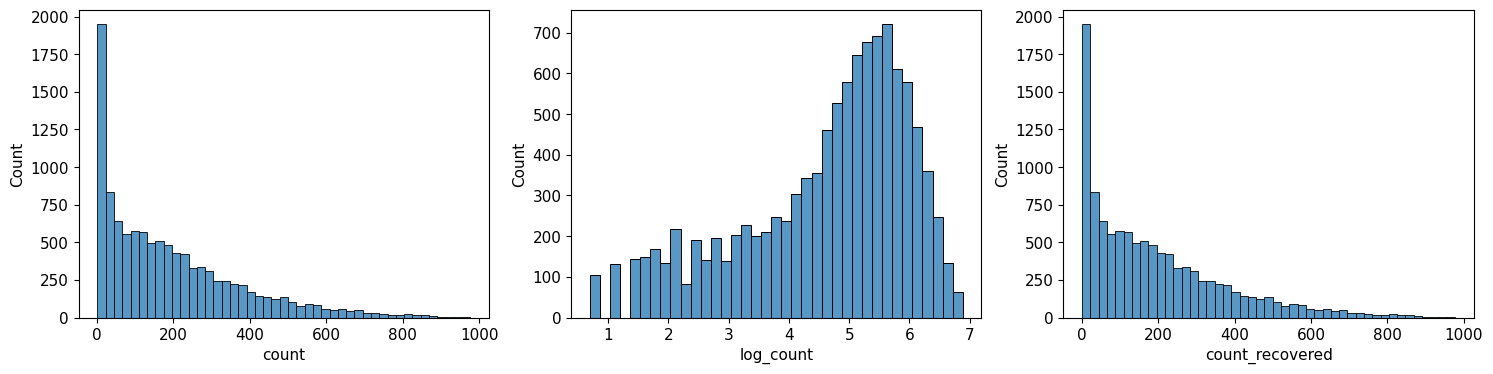

In [14]:
train['log_count'] = np.log(train['count'] + 1)
train['count_recovered'] = np.exp(train['log_count']) - 1

fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 4)

ax1 = sns.histplot(train['count'], ax=axes[0])
ax2 = sns.histplot(train['log_count'], ax=axes[1])
ax3 = sns.histplot(train['count_recovered'], ax=axes[2])

# 결과 : count에 자연로그 취해주니 정규분포에 가까운 모양을 보임
# log를 씌운 값을 예측하는 것이 정확도가 더 좋을 것

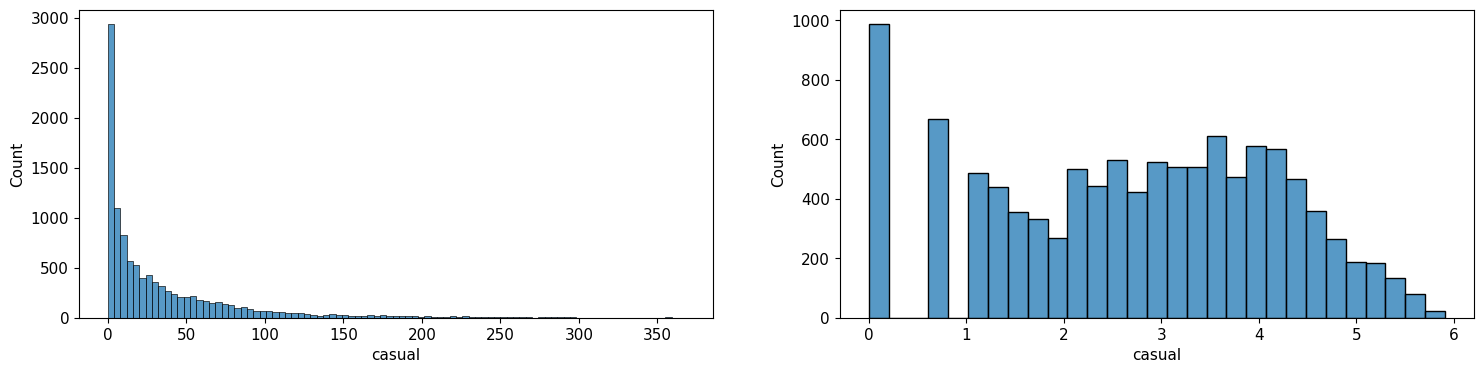

In [15]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18,4)

ax1 = sns.histplot((train['casual']), ax=axes[0])
ax2 = sns.histplot(np.log1p(train['casual']), ax=axes[1])

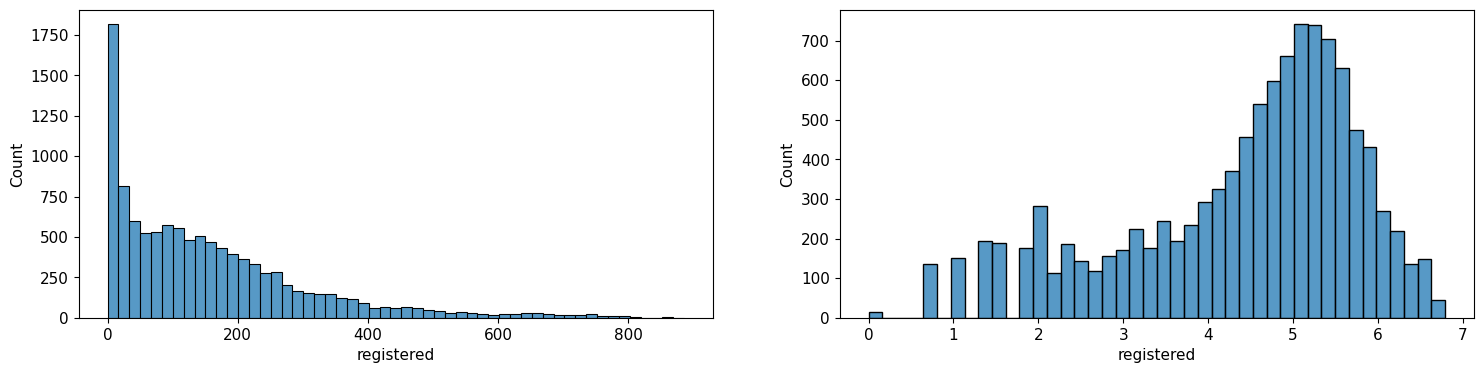

In [16]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18,4)

ax1 = sns.histplot((train['registered']), ax=axes[0])
ax2 = sns.histplot(np.log1p(train['registered']), ax=axes[1])

In [17]:
# casual과 registered도 자연로그를 취해준 값이 정규분포 형태임
# log를 씌워야 함
train['log_casual'] = np.log1p(train['casual'])
train['log_registered'] = np.log1p(train['registered'])

In [18]:
# 교차검증 - random forest 사용
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=50)
rf

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=50)

In [20]:
# casual
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
                 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek']
label_name = 'log_casual'

X_train = train[feature_names]
print(X_train.shape)

y_log_casual_train = train[label_name]
print(y_log_casual_train.shape)

X_test = test[feature_names]
print(X_test.shape)


(10886, 11)
(10886,)
(6493, 11)


In [21]:
from sklearn.model_selection import cross_val_predict

# 자연로그 취한 값 예측
y_log_casual_predict = cross_val_predict(rf, X_train, y_log_casual_train, cv=20)
y_log_casual_predict[:10]

array([1.60676742, 1.11932773, 1.30221865, 0.99809257, 0.59612915,
       0.3790108 , 0.54643101, 0.92047712, 1.35031676, 3.33046619])

In [22]:
# exp 이용해서 원래 casual 대여량 반환
y_casual_predict = np.exp(y_log_casual_predict) - 1
y_casual_predict[:10]

array([ 3.98666537,  2.06279449,  2.67744658,  1.71310183,  0.81507928,
        0.46083881,  0.72707809,  1.5104879 ,  2.8586476 , 26.95136934])

In [24]:
# registered
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'year', 'hour', 'dayofweek']
label_name = 'log_registered'

X_train = train[feature_names]
print(X_train.shape)

y_log_registered_train = train[label_name]
print(y_log_registered_train.shape)

X_test = test[feature_names]
print(X_test.shape)

(10886, 11)
(10886,)
(6493, 11)


In [25]:
from sklearn.model_selection import cross_val_predict

y_registered_log_predict = cross_val_predict(rf, X_train, y_log_registered_train, cv=20)
y_registered_log_predict[:10]

array([3.10622601, 3.07092351, 2.9214943 , 2.08423834, 1.46586764,
       1.08287596, 1.18668658, 2.11184334, 3.72134801, 4.02290791])

In [26]:
# exp 이용해서 원래 registered 대여량 반환
y_registered_predict = np.exp(y_registered_log_predict) - 1
y_registered_predict[:10]

array([21.33658717, 20.56180602, 17.56901446,  7.03846654,  3.33129964,
        1.95316054,  2.27620776,  7.26345958, 40.32005659, 54.8633152 ])

In [27]:
# y_predict 만들기
y_predict = y_casual_predict + y_registered_predict
y_predict[:10]

array([25.32325254, 22.62460051, 20.24646104,  8.75156836,  4.14637891,
        2.41399935,  3.00328585,  8.77394748, 43.17870419, 81.81468454])

In [28]:
y_train = train['count']

In [29]:
# RMSLE_점수가 낮을 수록 정확도가 더 높음
# Mean Squared Logarithmic Error
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_predict, y_train)
score = np.sqrt(score)
score

0.353517614137554

In [30]:
!pip install tqdm

In [46]:
# 하이퍼파라미터 최적화
# Coarse Search
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error
from tqdm import tqdm

num_loop = 50
df_list = []

for i in tqdm(range(num_loop)):
    max_depth = np.random.randint(2,101)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=50,
                                  n_jobs=-1,
                                  random_state=50,
                                  max_features=50)
    y_log_casual_predict = cross_val_predict(model, X_train, y_log_casual_train, cv=20)
    y_casual_predict = np.exp(y_log_casual_predict) - 1

    y_registered_log_predict = cross_val_predict(model, X_train, y_log_registered_train, cv=20)
    y_registered_predict = np.exp(y_registered_log_predict) - 1

    y_predict = y_casual_predict + y_registered_predict

    score = mean_squared_log_error(y_predict, y_train)
    score = np.sqrt(score)

    df = pd.DataFrame({'max_depth':[max_depth], 'max_features':[max_features], 'score':[score]})
    df_list.append(df)

parameter_df = pd.concat(df_list, axis=0)
parameter_df.sort_values(by='score').head()

100%|██████████| 50/50 [32:13<00:00, 38.66s/it]


,max_depth,max_features,score
0,55,0.932494,0.367164
0,25,0.130413,0.367164
0,57,0.784276,0.367164
0,4,0.627213,0.367164
0,35,0.728866,0.367164


In [47]:
best_max_depth = 55
best_max_features = 0.932494

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3000,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=50,
                              n_jobs=-1)
model

RandomForestRegressor(max_depth=55, max_features=0.932494, n_estimators=3000,
                      n_jobs=-1, random_state=50)

In [49]:
feature_names = ['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
                 'windspeed','year', 'hour', 'dayofweek']

label_name_cas = 'log_casual'
label_name_reg = 'log_registered'

X_train = train[feature_names]
print(X_train.shape)

y_log_casual_train = train[label_name_cas]
print(y_log_casual_train.shape)

y_log_registered_train = train[label_name_reg]
print(y_log_registered_train.shape)

X_test = test[feature_names]
print(X_test.shape)

(10886, 10)
(10886,)
(10886,)
(6493, 10)


In [50]:
# casual - Fit, Predict
model.fit(X_train, y_log_casual_train)
log_casual_predict = model.predict(X_test)
casual_predict = np.exp(log_casual_predict) - 1
casual_predict[:10]

array([1.27396578, 0.43188811, 0.75773436, 0.61338076, 0.43440522,
       0.19824741, 1.08498872, 4.08276932, 6.43287907, 5.67116163])

In [51]:
# registered - Fit, Predict
model.fit(X_train, y_log_registered_train)
log_registered_predict = model.predict(X_test)
registered_predict = np.exp(log_registered_predict) - 1
registered_predict[:10]

array([ 10.90933652,   4.92321436,   1.78924117,   1.6238765 ,
         1.62275666,   5.73407644,  36.97581164,  99.51464852,
       218.49935768, 129.3222203 ])

In [52]:
# 최종 예측값
predictions = casual_predict + registered_predict
predictions[:10]

array([ 12.1833023 ,   5.35510247,   2.54697553,   2.23725726,
         2.05716187,   5.93232385,  38.06080036, 103.59741784,
       224.93223675, 134.99338193])

In [53]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [54]:
submission['count'] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.183302
1,2011-01-20 01:00:00,5.355102
2,2011-01-20 02:00:00,2.546976
3,2011-01-20 03:00:00,2.237257
4,2011-01-20 04:00:00,2.057162


In [61]:
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/RandomForest_casual_registered.csv", index=False)